In [ ]:
pip install names

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 789 kB 5.4 MB/s 
  Created wheel for names: filename=names-0.3.0-py3-none-any.whl size=803699 sha256=679562c3be7fef782ba423f72ed6aa2615029be7c3d2a3efcc09597ceee379dc
  Stored in directory: /root/.cache/pip/wheels/05/ea/68/92f6b0669e478af9b7c3c524520d03050089e034edcc775c2b
Successfully built names


In [ ]:
pip install vk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for vk: filename=vk-2.0.2-py3-none-any.whl size=8278 sha256=0a842c3645d688898e6ce23834b11bdccda7aa49edc7a93fa5f7620e2e485ff9
  Stored in directory: /root/.cache/pip/wheels/7b/d0/2b/d07628ebced43577b8001d0c9d716f972059535bbaadb1eb9d
Successfully built vk


In [ ]:
import pandas as pd
import names
import numpy as np

from PIL import Image
import requests
from IPython.core.display import HTML
import sqlite3 as db
from sqlalchemy import create_engine
from google.colab import files
import vk

In [ ]:
df = pd.DataFrame(columns=['id', 'name', 'born', 'photo', 'num_ord_prikaza', 'num_enrollment', 'date_enrollment', 'birth_place', 'corpus', 'adress'])

In [ ]:
df

,id,name,born,photo,num_ord_prikaza,num_enrollment,date_enrollment,birth_place,corpus,adress


In [ ]:
date_born = np.datetime64('2001-01-01')
date_enrol = np.datetime64('2019-08-01')

places = ['Москва', 'Краснодар', 'Химки', "Ростов", 'Казань', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург']

url = Image.open(requests.get('https://steamuserimages-a.akamaihd.net/ugc/39729720120410118/05901EC07E75AC18FF07649BB6A524790A94DF3E/', stream=True).raw)
html = '<img src = "%s"/>' % url

name = []
stud_id = []
born = []
num_ord_prikaza = []
num_enrollment = []
adress = []
corpus = []
date_enrollment = []
birth_place = []

for i in range(100):
    name.append(names.get_full_name())
    stud_id.append(i)
    
    num_ord_prikaza.append(np.random.randint(1,1000))
    num_enrollment.append(np.random.randint(1,1000))
    adress.append(np.random.randint(1,37))
    corpus.append(np.random.randint(1,6))

    born.append(date_born + np.random.randint(1,365))
    date_enrollment.append(date_enrol + np.random.randint(1,30))

    birth_place.append(np.random.choice(places)) 

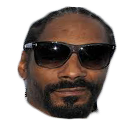

In [ ]:
url

In [ ]:
df['name'] = name
df['id'] = stud_id
df['born'] = born
df['num_ord_prikaza'] = num_ord_prikaza
df['num_enrollment'] = num_enrollment
df['adress'] = adress
df['corpus'] = corpus
df['date_enrollment'] = date_enrollment
df['birth_place'] = birth_place
df['photo'] = html

In [ ]:
df_html = df.to_html(escape=False)

In [ ]:
engine = create_engine('sqlite:///experimental_results.db', echo=False)
df.to_sql("student_data", con = engine, if_exists = 'replace')

In [ ]:
files.download('experimental_results.db')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
display(HTML(df_html))

,id,name,born,photo,num_ord_prikaza,num_enrollment,date_enrollment,birth_place,corpus,adress
0,0,Robert Morales,2001-09-02,"""/>",397,633,2019-08-29,Новосибирск,3,8
1,1,Tracey Peoples,2001-09-22,"""/>",684,257,2019-08-30,Химки,1,36
2,2,Virginia Rodriguez,2001-03-21,"""/>",234,727,2019-08-09,Новосибирск,3,18
3,3,Susan Neuenfeldt,2001-06-22,"""/>",963,636,2019-08-29,Новосибирск,3,28
4,4,Carl White,2001-10-20,"""/>",68,540,2019-08-02,Новосибирск,3,33
5,5,Claudia Amaya,2001-08-20,"""/>",129,235,2019-08-11,Новосибирск,5,1
6,6,Charles Billiot,2001-09-19,"""/>",914,784,2019-08-09,Химки,2,15
7,7,William Pablo,2001-10-17,"""/>",758,26,2019-08-09,Екатеринбург,4,15
8,8,Rita Holden,2001-04-24,"""/>",939,456,2019-08-21,Екатеринбург,5,31
9,9,Charles Rodriguez,2001-11-07,"""/>",608,694,2019-08-26,Химки,2,32
